In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
file = 'Maternal Health Risk Data Set.csv' 
data = pd.read_csv(file) 
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
data_cleaned = data.dropna()
output_file = 'data_cleaned.csv'
data_cleaned.to_csv(output_file, index=False) 
print(f"Cleaned data saved to '{output_file}'")

Cleaned data saved to 'data_cleaned.csv'


In [80]:
cleaned_file = 'data_cleaned.csv'
new_data = pd.read_csv(cleaned_file)
new_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


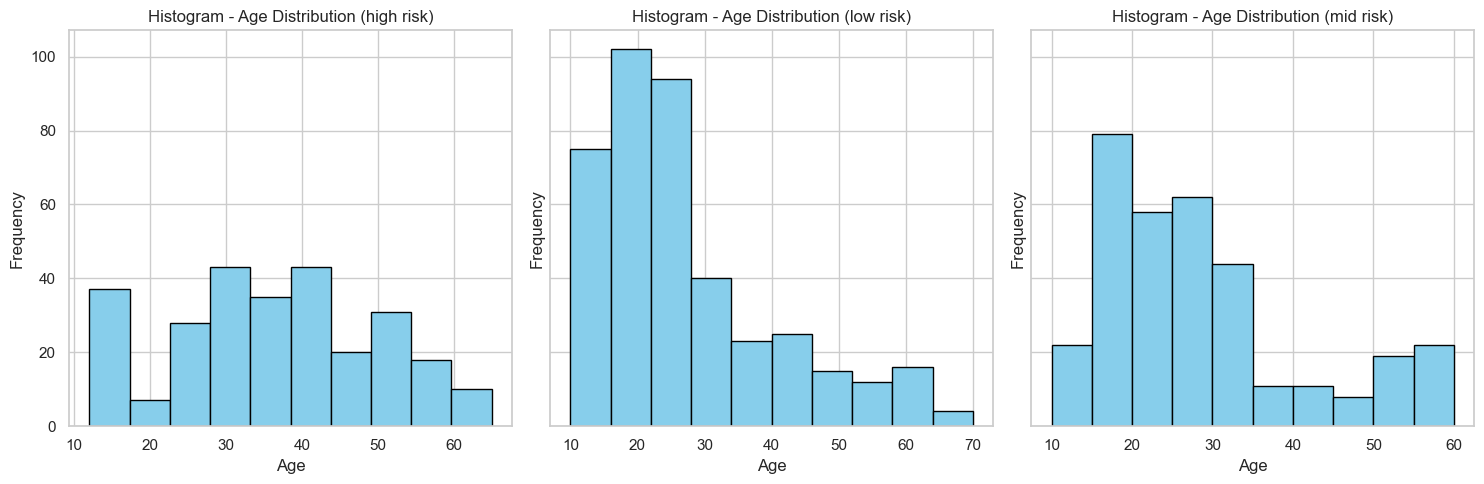

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for i, (risk, group) in enumerate(new_data.groupby('RiskLevel')):
    axes[i].hist(group['Age'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram - Age Distribution ({risk})')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

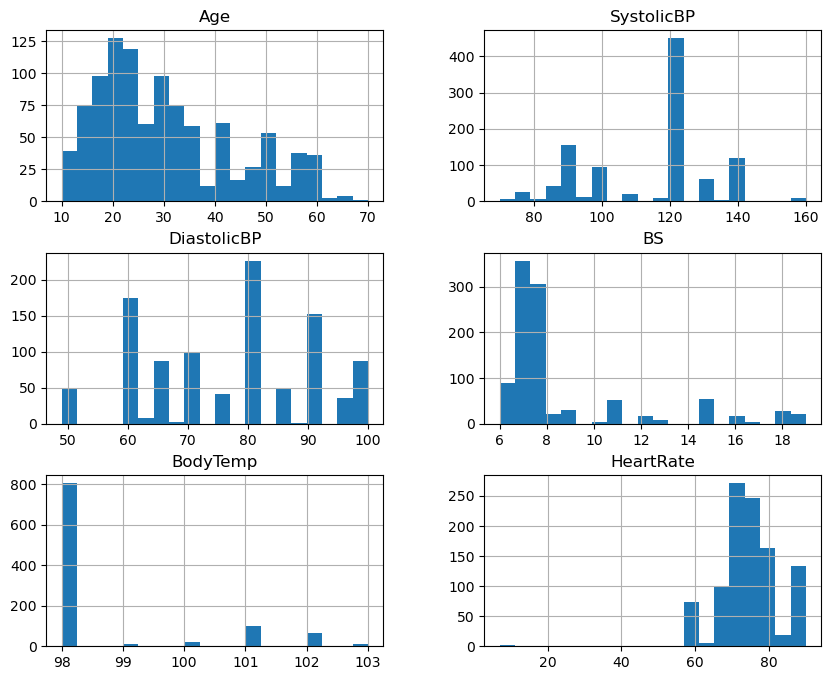

In [7]:
new_data.hist(figsize=(10, 8), bins=20)  
plt.show()

In [21]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [22]:
print(new_data.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [24]:
print(new_data['RiskLevel'].value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


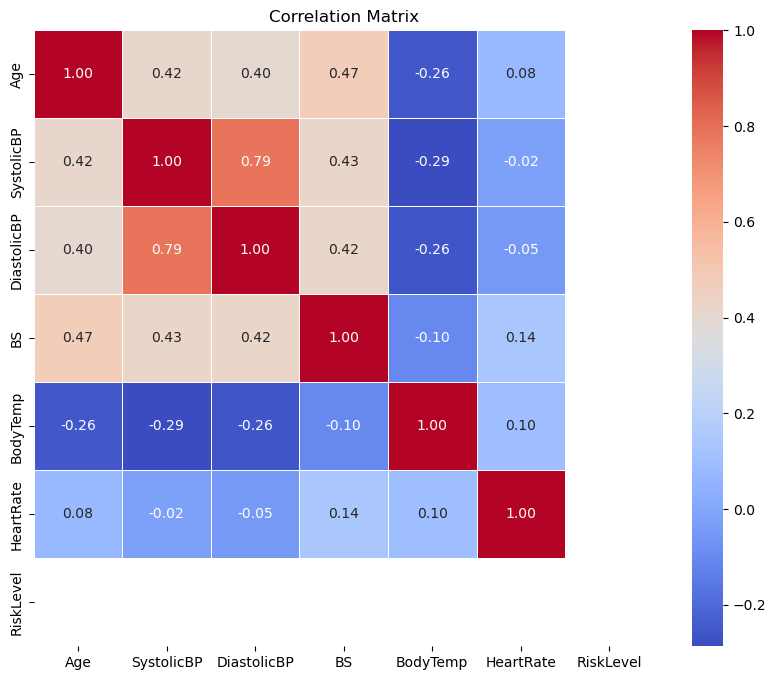

In [30]:
#Correlation Matrix
# Convert 'RiskLevel' to numerical values
new_data['RiskLevel'] = new_data['RiskLevel'].map({'low risk': 0, 'mid risk': 1, 'high risk': 2})  # Adjust the mapping as needed

#make correlation matrix 
correlation_matrix = new_data.corr()

# show correlation matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show() 

In [9]:
#Summary statistics 1
age_column = 'Age'  # Replace with the actual column name

# Calculate the mean of the specified column
mean_value = new_data[age_column].mean()

print(f"The mean of the '{age_column}' column is: {mean_value}") 

median_value = new_data[age_column].median()

print(f"The median of the '{age_column}' column is: {median_value}") 

The mean of the 'Age' column is: 29.871794871794872
The median of the 'Age' column is: 26.0


In [13]:
#Summary statistics 2: low risk women  
low_risk_women = new_data[new_data['RiskLevel']=='low risk']
# Calculate the mean age for women with low risk level
low_risk_mean_age = low_risk_women['Age'].mean()
print(f"The mean age of women with low risk level is: {low_risk_mean_age:.2f} years.")
# mean systolic BP  
low_risk_mean_sysBP = low_risk_women['SystolicBP'].mean()
print(f"The mean systolic blood pressure of women with low risk level is {low_risk_mean_sysBP:.2f} mmHg.")
# mean diastolic BP  
low_risk_mean_dsBP = low_risk_women['DiastolicBP'].mean()
print(f"The mean diastolic blood pressure of women with low risk level is {low_risk_mean_dsBP:.2f} mmHg.")
# mean BS
low_risk_mean_blood_sugar = low_risk_women['BS'].mean()
print(f"The mean blood sugar of women with low risk level is {low_risk_mean_blood_sugar:.2f} mmol/L.")

The mean age of women with low risk level is: 26.87 years.
The mean systolic blood pressure of women with low risk level is 105.87 mmHg.
The mean diastolic blood pressure of women with low risk level is 72.53 mmHg.
The mean blood sugar of women with low risk level is 7.22 mmol/L.


In [15]:
medium_risk_women = new_data[new_data['RiskLevel']=='mid risk']
# Calculate the mean age for women with low risk level
medium_risk_mean_age = medium_risk_women['Age'].mean()
print(f"The mean age of women with medium risk level is: {medium_risk_mean_age:.2f} years.")
# mean systolic BP  
medium_risk_mean_sysBP = medium_risk_women['SystolicBP'].mean()
print(f"The mean systolic blood pressure of women with medium risk level is {medium_risk_mean_sysBP:.2f} mmHg.")
# mean diastolic BP  
medium_risk_mean_dsBP = medium_risk_women['DiastolicBP'].mean()
print(f"The mean diastolic blood pressure of women with medium risk level is {medium_risk_mean_dsBP:.2f} mmHg.")
# mean BS
medium_risk_mean_blood_sugar = medium_risk_women['BS'].mean()
print(f"The mean blood sugar of women with medium risk level is {medium_risk_mean_blood_sugar:.2f} mmol/L.")

The mean age of women with medium risk level is: 28.36 years.
The mean systolic blood pressure of women with medium risk level is 113.15 mmHg.
The mean diastolic blood pressure of women with medium risk level is 74.23 mmHg.
The mean blood sugar of women with medium risk level is 7.80 mmol/L.


In [16]:
# Summary statistics 3: medium risk women 
high_risk_women = new_data[new_data['RiskLevel']=='high risk']
# Calculate the mean age for women with low risk level
high_risk_mean_age = high_risk_women['Age'].mean()
print(f"The mean age of women with high risk level is: {high_risk_mean_age:.2f} years.")
# mean systolic BP  
high_risk_mean_sysBP = high_risk_women['SystolicBP'].mean()
print(f"The mean systolic blood pressure of women with high risk level is {high_risk_mean_sysBP:.2f} mmHg.")
# mean diastolic BP  
high_risk_mean_dsBP = high_risk_women['DiastolicBP'].mean()
print(f"The mean diastolic blood pressure of women with high risk level is {high_risk_mean_dsBP:.2f} mmHg.")
# mean BS
high_risk_mean_blood_sugar = high_risk_women['BS'].mean()
print(f"The mean blood sugar of women with high risk level is {high_risk_mean_blood_sugar:.2f} mmol/L.")

The mean age of women with high risk level is: 36.22 years.
The mean systolic blood pressure of women with high risk level is 124.19 mmHg.
The mean diastolic blood pressure of women with high risk level is 85.07 mmHg.
The mean blood sugar of women with high risk level is 12.12 mmol/L.


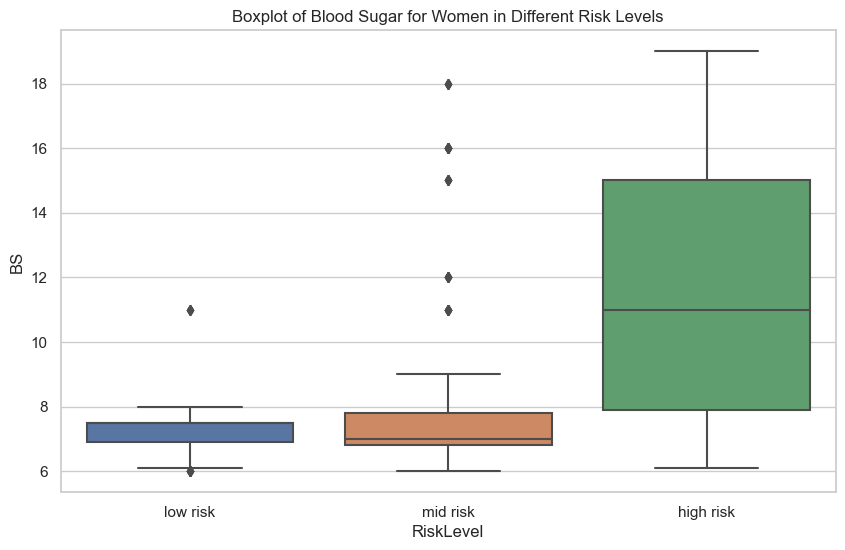

In [98]:
# Boxplot of blood sugar concentration at different levels 
risk_values_category = pd.concat([low_risk_women, medium_risk_women, high_risk_women])

plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='BS', data=risk_values_category)
plt.title('Boxplot of Blood Sugar for Women in Different Risk Levels')
plt.show()

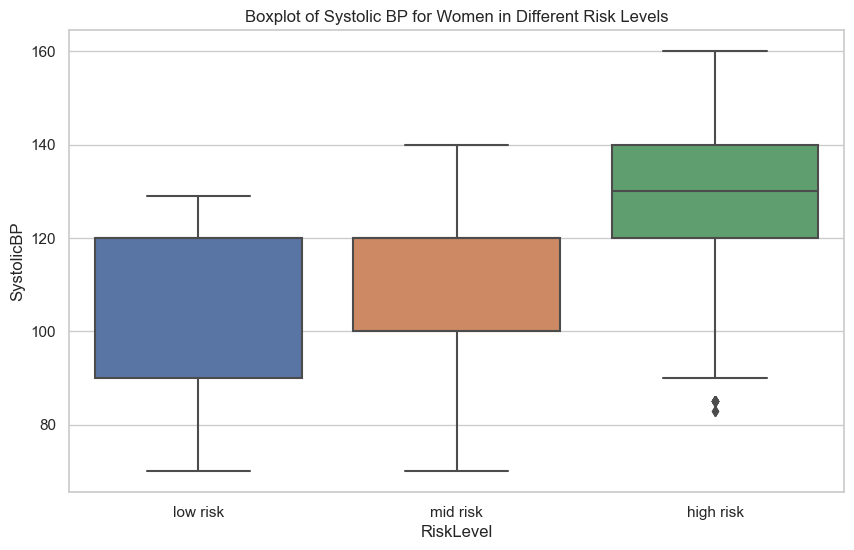

In [106]:
# Boxplot for systolic BP by risk level 
risk_values_category = pd.concat([low_risk_women, medium_risk_women, high_risk_women])

plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='SystolicBP', data=risk_values_category)
plt.title('Boxplot of Systolic BP for Women in Different Risk Levels')
plt.show()

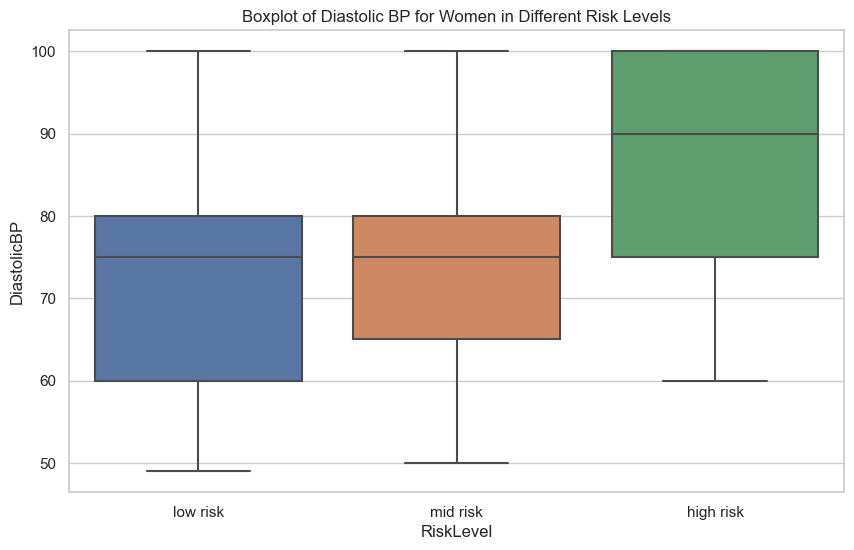

In [105]:
# Boxplot for diastolic BP by risk level 
risk_values_category = pd.concat([low_risk_women, medium_risk_women, high_risk_women])

plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='DiastolicBP', data=risk_values_category)
plt.title('Boxplot of Diastolic BP for Women in Different Risk Levels')
plt.show()

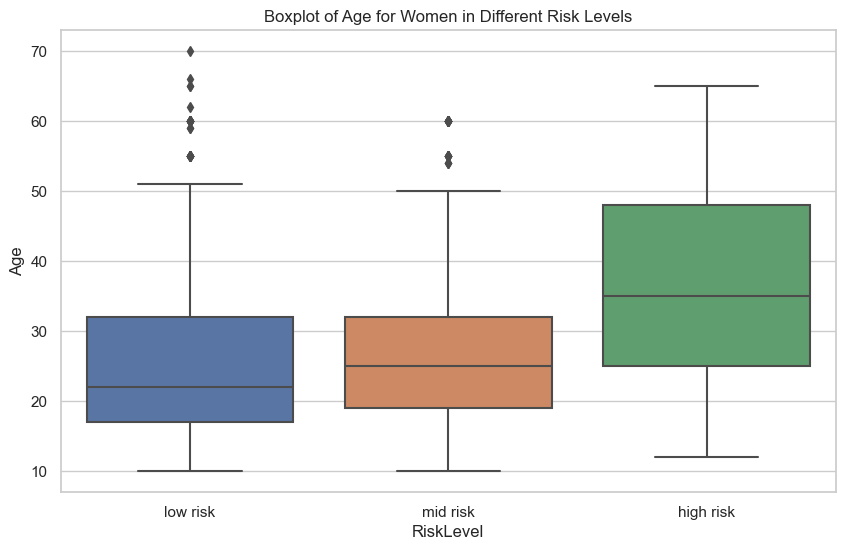

In [107]:
# Boxplot for age in different risk levels 
risk_values_category = pd.concat([low_risk_women, medium_risk_women, high_risk_women])

plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='Age', data=risk_values_category)
plt.title('Boxplot of Age for Women in Different Risk Levels')
plt.show()